# DIGITAL IMAGE PROCESSING FINAL PROJECT


## Automatic Acne Detection and Marking

Group Members:
- Alana Jocelyn Natania Massie (22/496239/PA/21331)
- Bagus Alwan Bambang (22/492140/PA/21072)
- Louis Widi Anandaputra (22/4922218/PA/21090)

In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
image1 = cv2.imread('image.jpeg')
image2 = cv2.imread('image2.png')
image3 = cv2.imread('image3.jpeg')

In [4]:
def skin_segmentation(image, conv_kernel_size, sharpening_filter):
    img = image.copy()
    # Apply Gaussian blur to the input image
    blurred_image = cv2.GaussianBlur(image, (conv_kernel_size, conv_kernel_size), 5.5)
    
    # Convert blurred image to HSV color space
    hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)
    
    # Define lower and upper bounds for skin color in HSV
    lower_skin = np.array([0, 40, 70], dtype=np.uint8)
    upper_skin = np.array([40, 255, 255], dtype=np.uint8)
    
    # Create a binary mask for skin regions
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)
    
    # Apply morphological operations to refine the mask
    kernel = np.ones((5, 5), np.uint8)
    skin_mask = cv2.erode(skin_mask, kernel, iterations=4)
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
    skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)
    
    # Sharpen the sharpen_image for skin segmentation
    sharpened_image = cv2.filter2D(img, -1, kernel=sharpening_filter)
    
    # Bitwise AND the original image with the mask to extract skin regions
    skin_segmented = cv2.bitwise_and(sharpened_image, sharpened_image, mask=skin_mask)
    
    skin_segmented = skin_segmented.astype(np.uint8)
    return skin_segmented

In [5]:
def gaussian_kernel(kernel_size, sigma):
    kernel = np.fromfunction(lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - kernel_size//2)**2 + (y - kernel_size//2)**2) / (2 * sigma**2)), (kernel_size, kernel_size))
    normal = kernel / np.sum(kernel)
    return normal

In [6]:
filter_kernel = np.array(([-1,-1,-1],
                         [-1,9,-1],
                         [-1,-1,-1]), dtype = int)

(-0.5, 479.5, 478.5, -0.5)

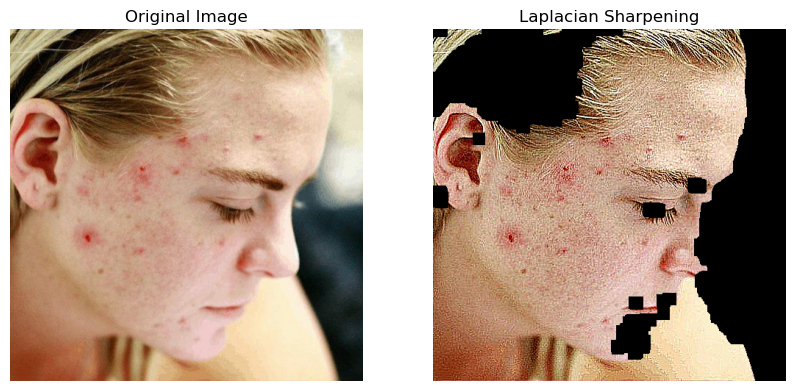

In [13]:
thresholded_image = skin_segmentation(image3,3, filter_kernel)
fig,ax = plt.subplots(ncols = 2, figsize = (10,20))
ax[0].imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis(False)
ax[1].imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Laplacian Sharpening')
ax[1].axis(False)

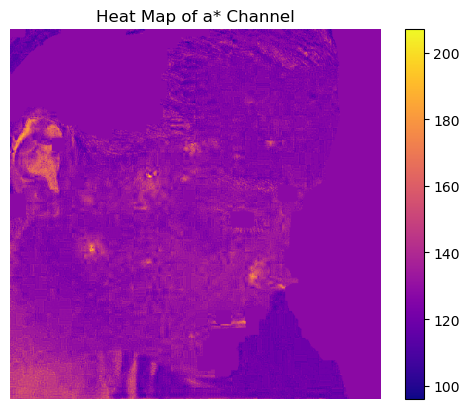

In [14]:
# Convert RGB image to CIELab color space
lab_image = cv2.cvtColor(thresholded_image, cv2.COLOR_RGB2Lab)

# Extract the 'a' channel
a_channel = lab_image[:, :, 1]

# Plot the 'a*' channel
plt.imshow(a_channel, cmap = 'plasma' ) 
plt.colorbar()
plt.title('Heat Map of a* Channel')
plt.axis(False)
plt.show()

In [15]:
# Apply Adaptive Thresholding to the 'a*' channel
_, binary_mask = cv2.threshold(a_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Applying morphological operations to remove small noise
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)

# Apply the binary mask to the original segmented skin image
result_image = cv2.bitwise_and(thresholded_image, thresholded_image, mask=binary_mask)

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_23625/1720722709.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


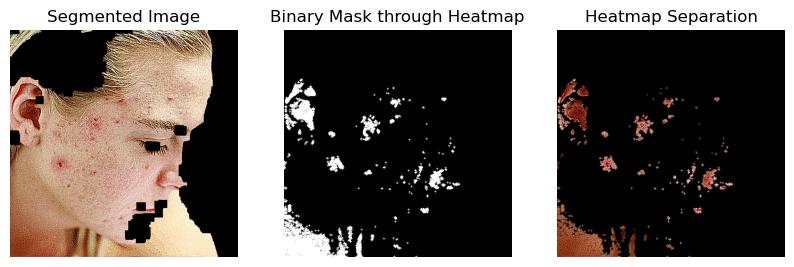

In [16]:
# Display the result
fig, ax = plt.subplots(ncols = 3, figsize=(10, 5))

ax[0].imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Segmented Image')
ax[0].axis(False)

ax[1].imshow(cv2.cvtColor(binary_mask, cv2.COLOR_BGR2RGB))
ax[1].set_title('Binary Mask through Heatmap')
ax[1].axis(False)

ax[2].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Heatmap Separation')
ax[2].axis(False)

fig.show()

[{'pt': (22.64849090576172, 411.3296813964844),
  'size': 7.914732933044434,
  'angle': -1.0,
  'response': 0.0},
 {'pt': (10.605165481567383, 194.63525390625),
  'size': 22.003646850585938,
  'angle': -1.0,
  'response': 0.0},
 {'pt': (53.568817138671875, 132.63836669921875),
  'size': 20.201770782470703,
  'angle': -1.0,
  'response': 0.0},
 {'pt': (7.354549407958984, 378.102783203125),
  'size': 15.092994689941406,
  'angle': -1.0,
  'response': 0.0},
 {'pt': (176.69163513183594, 301.0167541503906),
  'size': 11.185506820678711,
  'angle': -1.0,
  'response': 0.0},
 {'pt': (106.68678283691406, 283.9411315917969),
  'size': 8.581611633300781,
  'angle': -1.0,
  'response': 0.0},
 {'pt': (233.593994140625, 154.8575897216797),
  'size': 15.862444877624512,
  'angle': -1.0,
  'response': 0.0},
 {'pt': (180.66111755371094, 203.63694763183594),
  'size': 23.45400047302246,
  'angle': -1.0,
  'response': 0.0}]

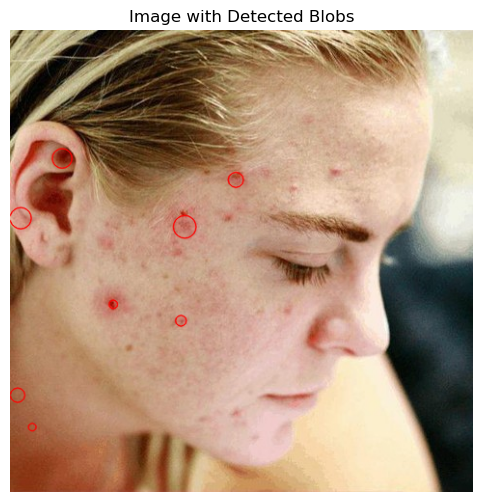

In [17]:
# Convert the image to grayscale
gray = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)

# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Change thresholds and other parameters as needed
params.filterByColor = True
params.minThreshold = 10
params.maxThreshold = 200
# Filter by Area
params.filterByArea = True
params.minArea = 50 
params.maxArea = 1000
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.3
# Filter by Ciruclarity
params.filterByCircularity = False
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.4


# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(gray)

# Draw detected blobs as circles on the original image
blobs_image = cv2.drawKeypoints(image3, keypoints, np.array([]), (0, 0, 255),
                                 cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR image to RGB for displaying with matplotlib
blobs_image_rgb = cv2.cvtColor(blobs_image, cv2.COLOR_BGR2RGB)

# Show the image with detected blobs using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(blobs_image_rgb)
plt.title('Image with Detected Blobs')
plt.axis('off')  # Turn off axis labels and ticks

# Extract features from keypoints
blob_features = []
for kp in keypoints:
    # Extract features from each keypoint (blob)
    blob_features.append({
        'pt': kp.pt,  # Position
        'size': kp.size,  # Diameter of the blob
        'angle': kp.angle,  # Orientation
        'response': kp.response, # The detector response (can be used as a score)
    })

blob_features

In [18]:
num_blobs = len(keypoints)
print(f"Number of blobs detected: {num_blobs}")

Number of blobs detected: 8
